In [1]:
%matplotlib inline 

In [2]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
#loading the dataset
data = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [46]:
#Iballing the data
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,0,1,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,85,0,0,0,1,0,0,0,1
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0,1,0,0
4998,4999,65,40,49,90034,3,0.5,0,0,0,0,1,0,0,1,0


In [47]:
#Checking head of data, for getting the feel of data 
data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0
5,6,37,13,29,92121,4,0.4,155,0,0,0,1,0,0,1,0
6,7,53,27,72,91711,2,1.5,0,0,0,0,1,0,0,1,0
7,8,50,24,22,93943,1,0.3,0,0,0,0,0,1,1,0,0
8,9,35,10,81,90089,3,0.6,104,0,0,0,1,0,0,1,0
9,10,34,9,180,93023,1,8.9,0,1,0,0,0,0,1,0,0


In [6]:
#Checking tail of data , for getting feel of data
data.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [7]:
#As Education column contains simple label , but machine learning algorithm will understand it that 1 is lesser than 
#2 and 2 is lesser than 3 . So in order to remove this doing one hot coding.
data["Education"] = data["Education"].replace({1:"Undergrad",2:"Graduate",3:"Advanced"})

In [8]:
#Confirming wheather it gets replaced or not.
data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,Graduate,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,Graduate,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,Advanced,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,Graduate,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,Advanced,0,1,0,0,0,0


In [9]:
#Machine learning algorithm will not understand strings, it only understand numbers so using get dummies function 
#get dummies function will used to convert categorical variable into dummy indicator variable.
data = pd.get_dummies(data, columns=['Education'])

In [10]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,0,1,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,85,0,0,0,1,0,0,0,1
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0,1,0,0
4998,4999,65,40,49,90034,3,0.5,0,0,0,0,1,0,0,1,0


In [11]:
print("Shape of data is ",data.shape)

Shape of data is  (5000, 16)


In [12]:
#checking the complete data information , which include no of rows, coulmns , data type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
ID                     5000 non-null int64
Age                    5000 non-null int64
Experience             5000 non-null int64
Income                 5000 non-null int64
ZIP Code               5000 non-null int64
Family                 5000 non-null int64
CCAvg                  5000 non-null float64
Mortgage               5000 non-null int64
Personal Loan          5000 non-null int64
Securities Account     5000 non-null int64
CD Account             5000 non-null int64
Online                 5000 non-null int64
CreditCard             5000 non-null int64
Education_Advanced     5000 non-null uint8
Education_Graduate     5000 non-null uint8
Education_Undergrad    5000 non-null uint8
dtypes: float64(1), int64(12), uint8(3)
memory usage: 522.6 KB


In [13]:
#Checking for missing value 
#np.real is used to check each column for each row and returns a boolean array
#below line will select only those rows which have non numeric value in any of the columns.
data[~data.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad


In [14]:
#above result confirm that non numeric value is not present in the data set hence there is no missing value.

In [15]:
#Looking at target column which is 'Personal Loan' to understand how data is distributed amongst the various values.

data.groupby(["Personal Loan"]).count()

#In data set 4520 data is of person who does not accept the loan and only 480 data is present for person who accepted 
#the loan.
#Most of the customers did not accept the personal loan offered.
#Models ability to predict much better for class 0 which is person who does not accept the loan.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
Personal Loan,,,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480


In [16]:
#5 point summary of data
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.300200,0.280600,0.419200
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.458391,0.449337,0.493478
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Saurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Saurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


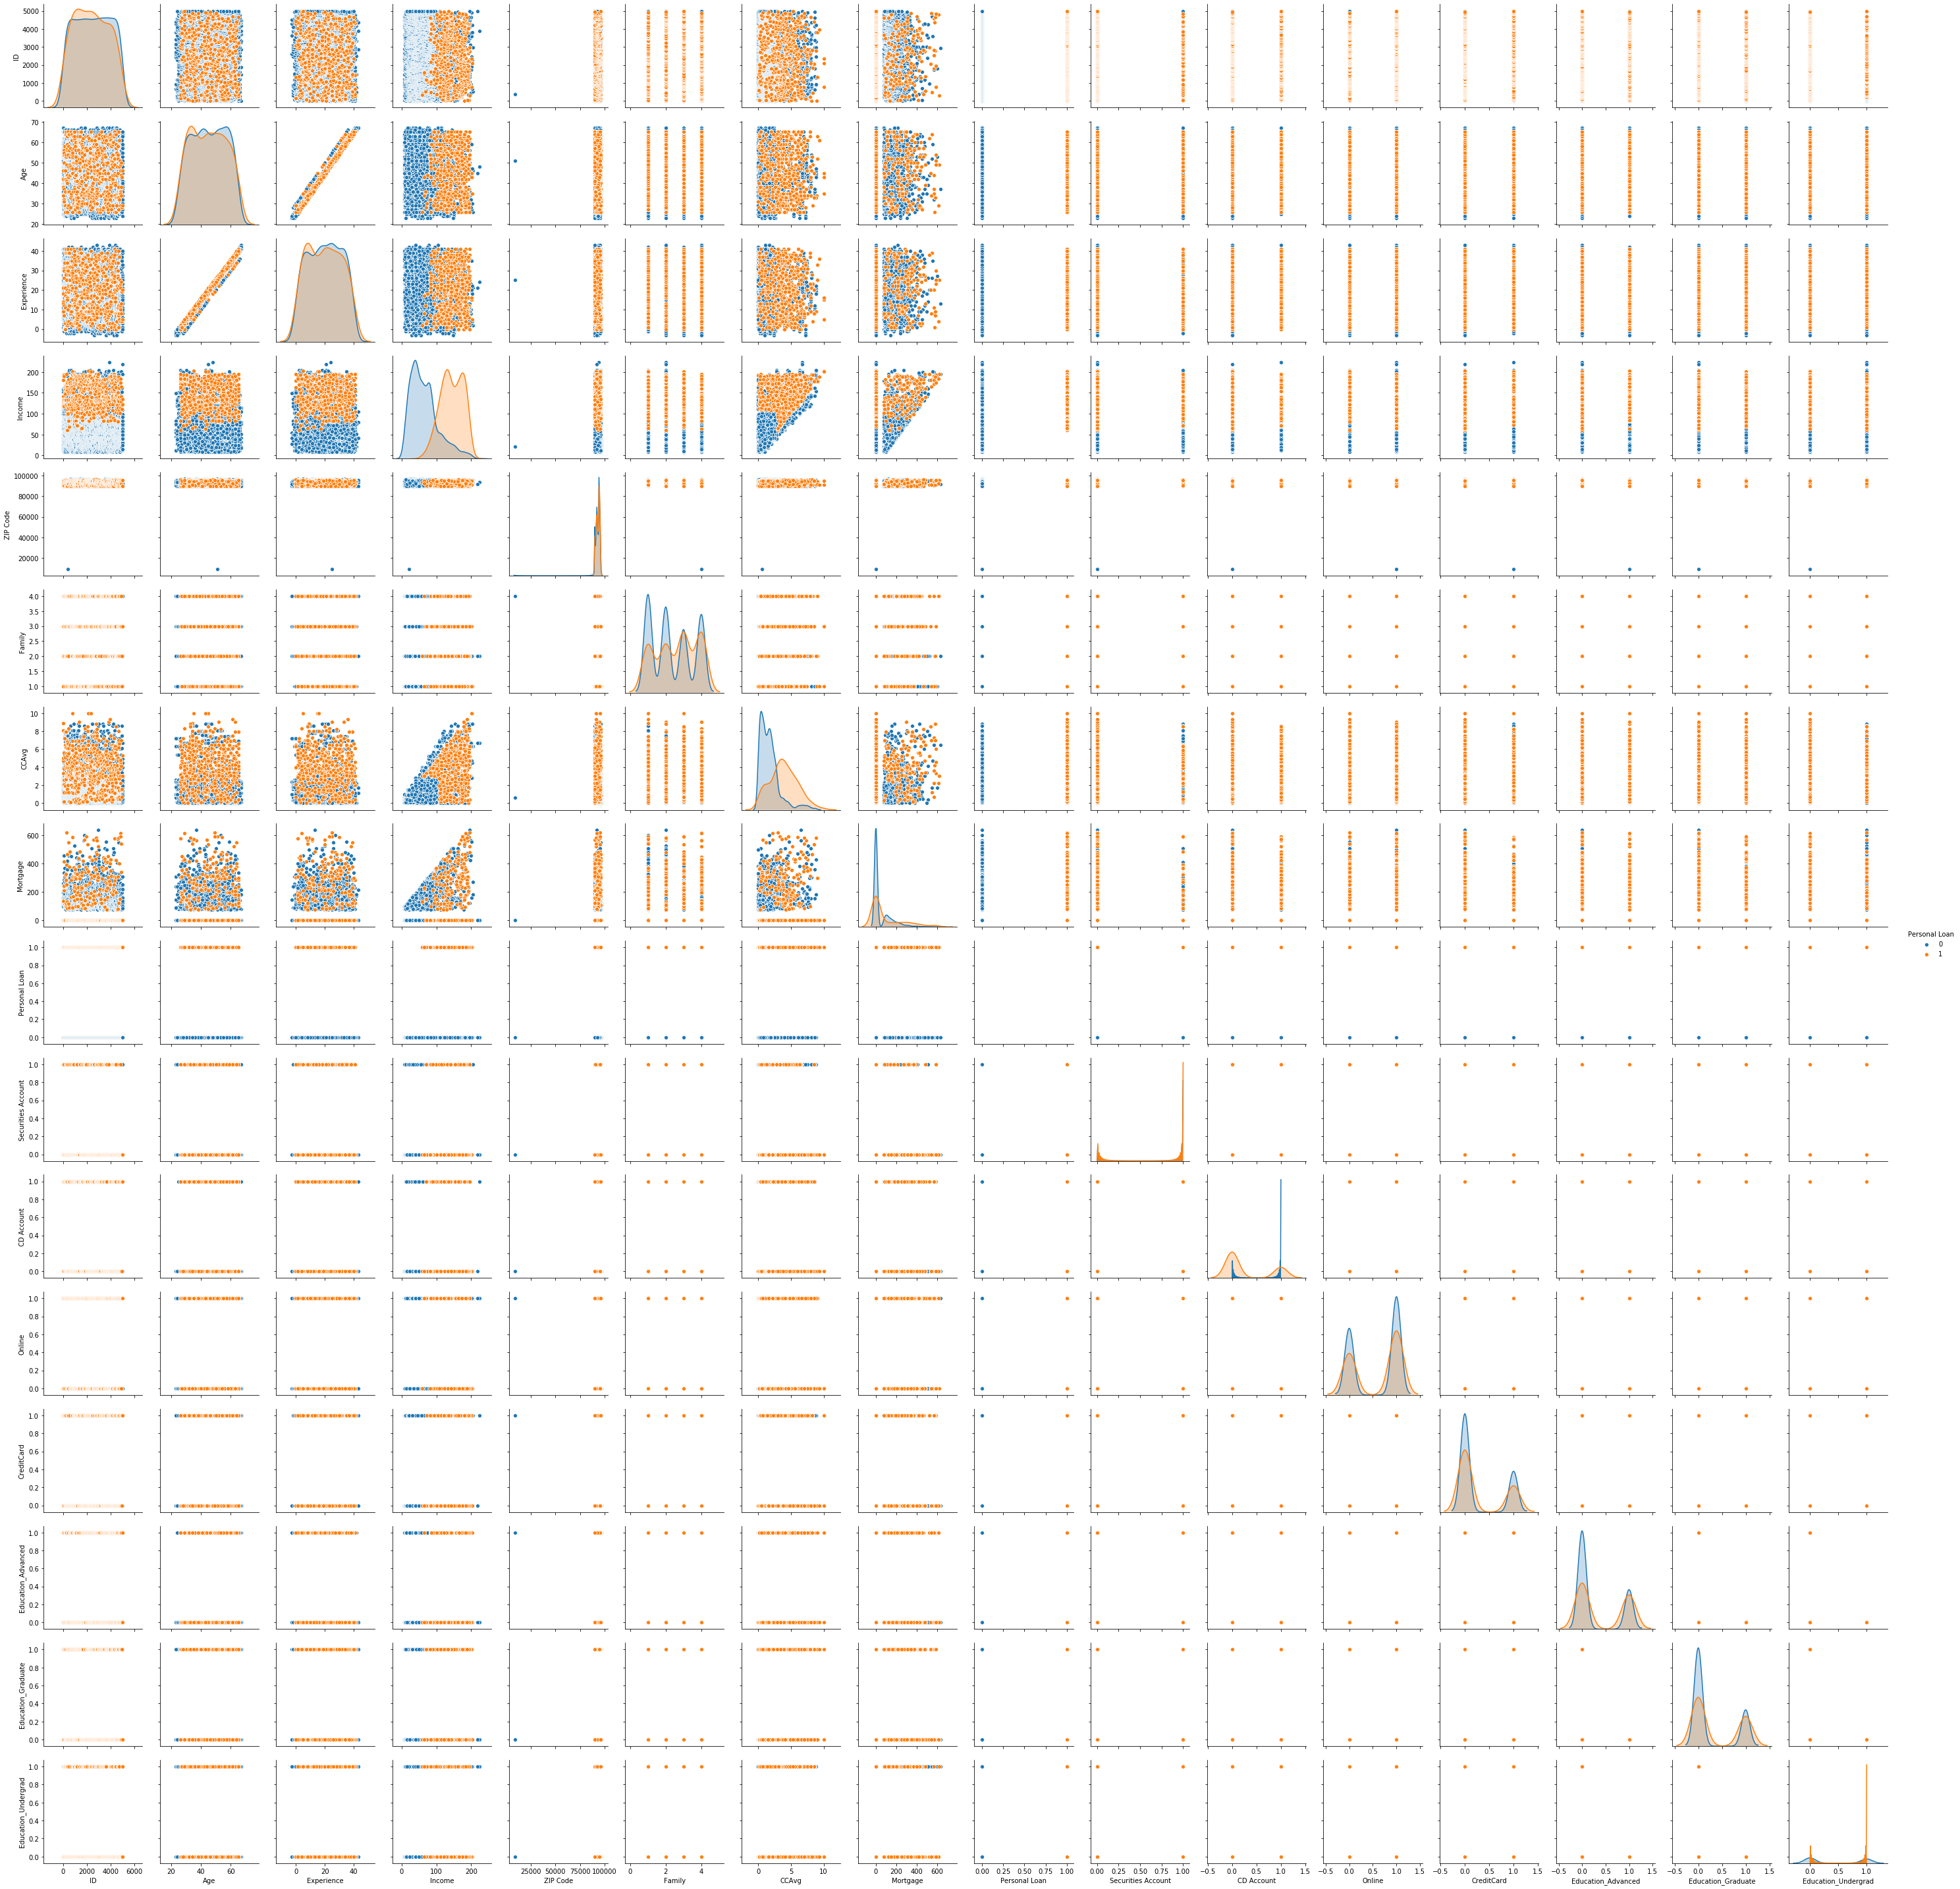

In [17]:
sns.pairplot(data,diag_kind='kde',hue = 'Personal Loan')

In [18]:
#Insights from pairplot
#for classification model need to look only at the diagonals.
#found that most of the attributes are poor attributes as they are overlapping.
#few attribute like income is good attribute,CC avg is also considered as good at some extent.
#except these two rest all attribute is poor attribute.

# Logistic Regression

In [19]:
#Separating target column and other column
X = data.drop('Personal Loan' , axis =1)
Y = data["Personal Loan"]

In [20]:
#Splitting the data into training and test set.
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3 ,random_state=3)

In [21]:
#Instantiating Logistic Regression model
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print("The score on training set is " ,model.score(X_train,y_train))
print("The score on test set is ",model.score(X_test,y_test))


The score on training set is  0.9085714285714286
The score on test set is  0.9086666666666666


C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
print("Confusion matrix through logistic regression \n",metrics.confusion_matrix(y_test, y_predict))
print("The complete classification report \n",metrics.classification_report(y_test,y_predict))

Confusion matrix through logistic regression 
 [[1316   33]
 [ 104   47]]
The complete classification report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1349
           1       0.59      0.31      0.41       151

    accuracy                           0.91      1500
   macro avg       0.76      0.64      0.68      1500
weighted avg       0.89      0.91      0.90      1500



In [23]:
#Comment on Recall
#98% of actual class 0 are predicted as class 0, in other words Recall of class 0 = 98%
#31% of actual class 1 are predicted as class 1, in other words Recall of class 1 = 31%

#Comment on precision
#Precision of class 0 is 93%, it means 93% of the people who are identified as class 0 , are truely belong to class 0.
#Precision of class 1 is 58.7%, it means 58% of the people who are identified as class 1 , are truely belong to class 1.

# KNN

In [24]:
data_knn = data
data_knn

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,0,1,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,85,0,0,0,1,0,0,0,1
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0,1,0,0
4998,4999,65,40,49,90034,3,0.5,0,0,0,0,1,0,0,1,0


In [25]:
#Separating the target column
X_knn = data_knn.drop('Personal Loan' , axis=1)
y_knn = data_knn["Personal Loan"]

In [26]:
#Applying Z score on X_knn as in knn distance calculation needs to be done , so standardising all the column.
from scipy.stats import zscore
X_knn_zscored = X_knn.apply(zscore)

In [27]:
#Spliting data into training set annd test set.
from sklearn.model_selection import train_test_split
X_train_knn,X_test_knn,y_train_knn,y_test_knn = train_test_split(X_knn_zscored,y_knn,test_size=0.3,random_state = 3)

In [28]:
#Instantiating the model
from sklearn.neighbors import KNeighborsClassifier
NNH =KNeighborsClassifier(n_neighbors=3)
#fitting the model
NNH.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [29]:
#Score on training and test set
print("Performance on training set" , NNH.score(X_train_knn,y_train_knn))
print("Performance on test set" , NNH.score(X_test_knn,y_test_knn))

Performance on training set 0.9742857142857143
Performance on test set 0.958


In [30]:
predicted_label_knn = NNH.predict(X_test_knn)

In [31]:
#Confusion matrix
from sklearn import metrics

print("Confusion matrix through KNN \n" , metrics.confusion_matrix(y_test_knn,predicted_label_knn))
print("The complete classification report of KNN\n",metrics.classification_report(y_test_knn,predicted_label_knn))

Confusion matrix through KNN 
 [[1345    4]
 [  59   92]]
The complete classification report of KNN
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1349
           1       0.96      0.61      0.74       151

    accuracy                           0.96      1500
   macro avg       0.96      0.80      0.86      1500
weighted avg       0.96      0.96      0.95      1500



In [32]:
#Insights from confusion matrix
#Recall of class 0 is 99.6% , it means 99.6% of class 0 is predicted as class 0
#Recall of class 1 is 60.7% , it means 60% of class 1 is predicted as class 1.

#Precision
#Precision of class 0 is  95%, it means 95% of class 0 who are identified as class 0 are truely class 0.
#precision of class 1 is 95.8% , it means 95.8% of class 1 who are identified as class 1 are truely class 1.

In [33]:
#Finding the optimal number of neighbor for maximum score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_knn, y_train_knn, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 3


# Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
data_naive = data

In [36]:
data_naive

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,0,1,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,85,0,0,0,1,0,0,0,1
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0,1,0,0
4998,4999,65,40,49,90034,3,0.5,0,0,0,0,1,0,0,1,0


In [37]:
X_naive = data_naive.drop('Personal Loan' , axis=1)
Y_naive = data["Personal Loan"]

In [38]:
#splitting data into 70:30
train_set,test_set,train_labels,test_labels = train_test_split(X_naive,Y_naive, test_size = 0.3,random_state = 1)

In [39]:
#instatiating the naive based model
model_naive = GaussianNB()
#fitting the model
model_naive.fit(train_set,train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
#Performance on train set 
print(model_naive.score(train_set,train_labels))

0.9017142857142857


In [41]:
test_pred = model.predict(test_set)
print("Confusion matrix through naive bayes alogorithm \n",metrics.confusion_matrix(test_labels,test_pred))

Confusion matrix through naive bayes alogorithm 
 [[1321   30]
 [ 103   46]]


In [42]:
print("The complete classification report \n",metrics.classification_report(test_labels,test_pred))

The complete classification report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.61      0.31      0.41       149

    accuracy                           0.91      1500
   macro avg       0.77      0.64      0.68      1500
weighted avg       0.90      0.91      0.90      1500



In [43]:
#Kfold and cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [44]:
score_naive = cross_val_score(model_naive,train_set,train_labels,cv=10)
print("Cross validation score:\n",score_naive,score_naive)
print("Average score:\n",np.average(score_naive))

Cross validation score:
 [0.8974359  0.90571429 0.88571429 0.87142857 0.89142857 0.91714286
 0.88571429 0.91428571 0.91428571 0.9226361 ] [0.8974359  0.90571429 0.88571429 0.87142857 0.89142857 0.91714286
 0.88571429 0.91428571 0.91428571 0.9226361 ]
Average score:
 0.9005786286302045


In [45]:
#According to me KNN is the best model as compared to other models which is Logistic Regression and Naive based as the 
#perfromance of KNN is very good.
#Its precision and recall is also much high as compared to other.
#The main reason for this might be KNN is a non parametric model, so it does not make pre assumption about the model.
